
#Мини-проект №2


##Описание данных


###user_data:

client – идентификатор пользователя

premium – является ли клиент премиальным

age – возраст


###logs:

client – идентификатор пользователя

success – результат (успех – 1, нет – 0)

platform – платформа

time – время в формате Unix

##1. Загрузим оба датасета и посмотрим на их содержание и характеристики

In [1]:
import pandas as pd

In [2]:
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv', sep = ',')
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv', sep = ',')

In [3]:
print('Данные')
print('________________________')
print('user_data')
print('                        ')
print(user_data.head(5))
print('________________________')
print('logs')
print('                        ')
print(logs.head(5))

Данные
________________________
user_data
                        
   client  premium  age
0   46346    False   58
1    4391    False   55
2   27372    False   64
3   11989    False   44
4   60664    False   49
________________________
logs
                        
   client  success  platform        time
0   40177     True     phone  1585412212
1   61468     True     phone  1585425658
2   35604    False     phone  1585459894
3    9961     True     phone  1585400189
4   10931     True  computer  1585468629


In [4]:
print('Размер user_data: ', user_data.shape)
print('Размер logs: ',logs.shape)

Размер user_data:  (2954, 3)
Размер logs:  (4500, 4)


In [5]:
print('Типы колонок')
print('________________________')
print('user_data')
print('                        ')
print(user_data.dtypes)
print('________________________')
print('logs')
print('                        ')
print(logs.dtypes)

Типы колонок
________________________
user_data
                        
client     int64
premium     bool
age        int64
dtype: object
________________________
logs
                        
client       int64
success       bool
platform    object
time         int64
dtype: object


In [6]:
print('Используемые платформы: ', logs.platform.unique())

Используемые платформы:  ['phone' 'computer' 'tablet']


##2. Клиенты, совершившие больше всего успешных операций


In [11]:
count_of_success = logs[(logs['success']==True)].value_counts('client').reset_index()
count_of_success

,client,count
0,12179,41
1,61468,41
2,52870,41
3,61473,41
4,92584,41
...,...,...
2840,34121,1
2841,34191,1
2842,34198,1
2843,34277,1


In [18]:
max_count_of_success = count_of_success['count'].max()
max_count_of_success

41

In [23]:
count_of_success[(count_of_success['count'] == max_count_of_success)].sort_values('client')['client']

,client
0,12179
8,28719
7,36165
2,52870
1,61468
3,61473
6,78349
5,82563
4,92584


##Платформа, с которых было совершено больше всех успешных операций

Phone

In [24]:
logs[(logs['success']==True)].value_counts('platform')

,count
platform,
phone,2019
computer,1090
tablet,180


##Наиболее популярная платформа среди премиумных клиентов
Phone

In [41]:
all_data = user_data.merge(logs, how = 'inner', on='client')
all_data # объединенный по клиентам датасетом all_data

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [40]:
all_data[(all_data['premium']==True)].value_counts('platform')

,count
platform,
phone,246
computer,150
tablet,24


##Визуализация

Для построения графиков будем пользоваться объединенным по клиентам датасетом all_data

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

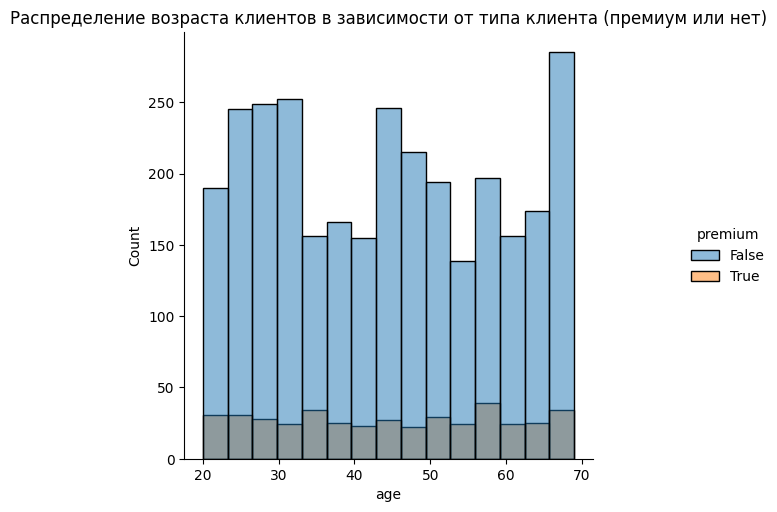

In [58]:
sns.displot(all_data, x = 'age', hue = 'premium').set(title='Распределение возраста клиентов в зависимости от типа клиента (премиум или нет)')


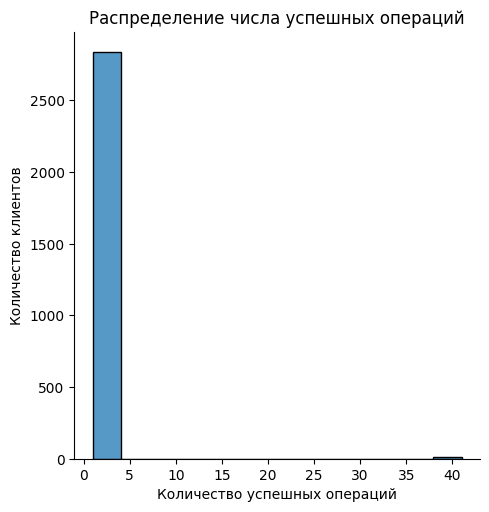

In [83]:
sns.displot(count_of_success['count']).set(title='Распределение числа успешных операций', ylabel = 'Количество клиентов', xlabel = 'Количество успешных операций')

[Text(0.5, 1.0, 'Число успешных операций, сделанных на платформе computer, в зависимости от возраста')]

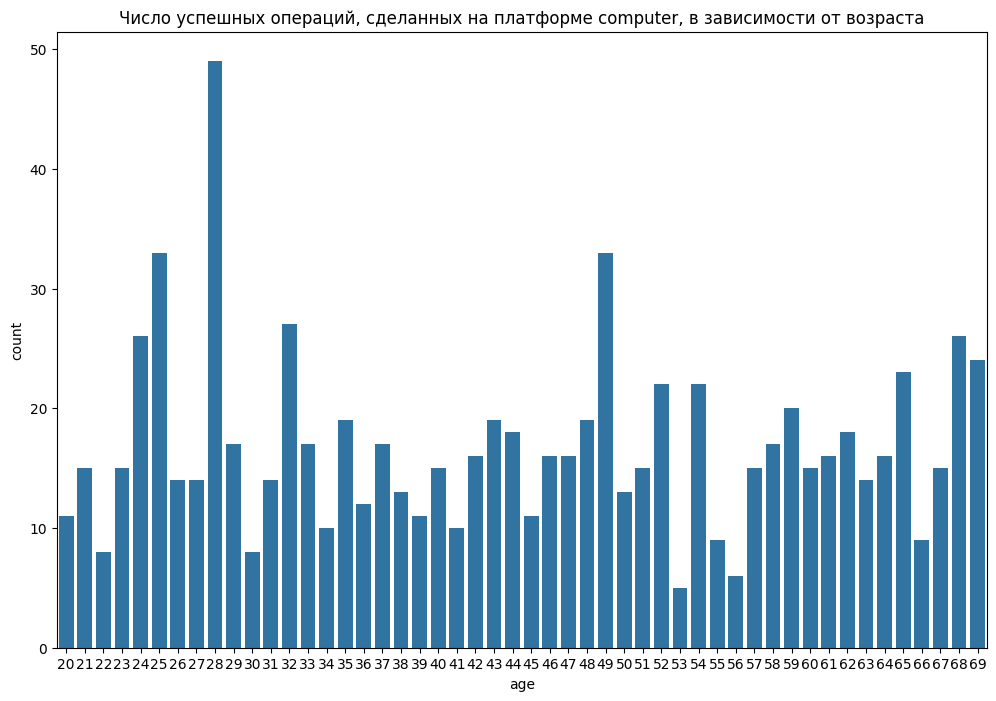

In [101]:
plt.figure(figsize=(12, 8))
sns.countplot(all_data[((all_data['platform'] == 'computer') & (all_data['success']==True))], x = "age").set(title='Число успешных операций, сделанных на платформе computer, в зависимости от возраста')